# Self-Driving Car Engineer Nanodegree


### Finding Lane Lines on the Road 

The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection. You are also free to explore and try other techniques that were not presented in the lesson. Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below). Once you have a working pipeline, try it out on the video stream below.

#### Import Packages

In [29]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#### Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


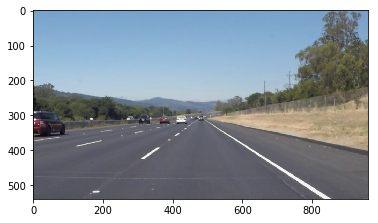

In [30]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')


#### Helper Functions

In [31]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

### Test Images

In [32]:
import os
os.listdir("test_images/")


['solidYellowLeft.jpg',
 'solidYellowCurve2.jpg',
 'whiteCarLaneSwitch.jpg',
 'solidYellowCurve.jpg',
 'solidWhiteRight.jpg',
 'solidWhiteCurve.jpg']

### Build a Lane Finding Pipeline


Build the pipeline and run your solution on all test_images. Make copies into the test_images_output directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [33]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

##### 1.color selection


##### 2.convert gray


##### 3.gaussian blur


##### 4.canny


##### 5.roi


##### 6.hough


##### 7.draw_lines

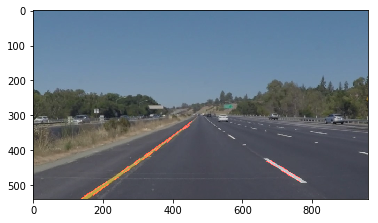

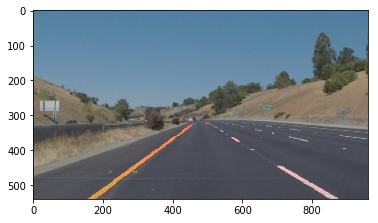

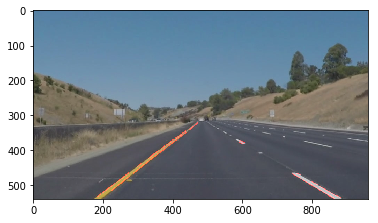

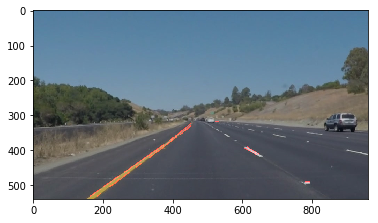

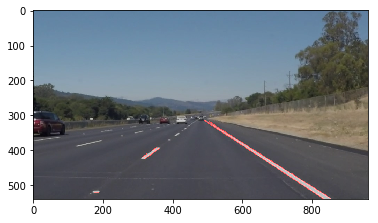

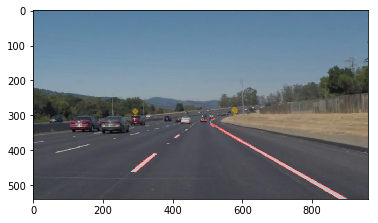

In [34]:
for image_name in os.listdir("test_images/"):
    image_full= str("test_images/"+image_name)
    image= mpimg.imread(image_full)
    stage_one_image= np.copy(image)
    image_gray=grayscale(stage_one_image)
    image_gaussian_blur= gaussian_blur(image_gray,9)
    image_edge= canny(image_gaussian_blur, low_threshold=50, high_threshold=150)
    
    vertices= np.array([[(0,image_edge.shape[0]),
                         (475,300),
                         (500,300),
                         (image_edge.shape[1],image_edge.shape[0])]],
                       dtype=np.int32)
    image_mask= region_of_interest(image_edge,vertices)
    image_lines=hough_lines(image_mask, rho=1, theta=np.pi/180, threshold=1,min_line_len=10, max_line_gap=1)
    image_draw_lines= weighted_img(image_lines, image,α=0.8, β=1., γ=0. )
    plt.figure()
    plt.imshow(image_draw_lines)



### Test on Videos

In [35]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [36]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    image_gray=grayscale(image)
    image_blur=gaussian_blur(image_gray,kernel_size=9)
    image_edge=canny(image_blur, low_threshold=50, high_threshold=150)
    vertices= np.array([[(0,image_edge.shape[0]),
                         (475,300),
                         (500,300),
                         (image_edge.shape[1],image_edge.shape[0])]],
                       dtype=np.int32)
    image_mask= region_of_interest(image_edge,vertices)
    image_lines=hough_lines(image_mask, rho=1, theta=np.pi/180, threshold=1,min_line_len=10, max_line_gap=1)
    image_draw_lines= weighted_img(image_lines, image,α=0.8, β=1., γ=0. )
    return image_draw_lines

In [37]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)


[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:04<00:00, 53.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 22.3 s, sys: 398 ms, total: 22.7 s
Wall time: 4.49 s


In [38]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))


#### Improve the draw_lines() function 

In [39]:
def improved_draw_lines1(img,lines,color=[255,0,0],thickness=10):
    
    
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    
   #line extrapolate process 

    if lines is None:
        return
    if len(lines)==0:
        return
    
    draw_right=True
    draw_left=True
    
    #find slopes of all lines
    slope_threshold=0.5
    slopes= []
    new_lines=[]
    for line in lines:
        x1,y1,x2,y2=line[0] # definition of line is line (x1,y1,x2,y2), (x1,y1),(x2,y2) is the point in the line 
        
        
        
        #calculate slope
        #need to first check whether the x2-x1 is 0 or not
        
        
        if x2-x1 ==0.:
            slope= 999
        else:
            slope= (y2-y1)/(x2-x1)
        if abs(slope)> slope_threshold:
            slopes.append(slope)
            new_lines.append(line)
            
    lines = new_lines
    
    
    #split lines into right_lines and left_lines according to slope. slope must has positive part and negative part
    
    
    right_lines=[]
    
    left_lines=[]
    
    #check the lines is in left side or right side
    
    
    for i, line in enumerate(lines):
        x1,y1,x2,y2 = line[0]
        image_x_center=img.shape[1]/2
        if slopes[i]>0 and x1> image_x_center and x2>image_x_center:
            right_lines.append(line)
        elif slopes[i]<0 and x1< image_x_center and x2<image_x_center:
            left_lines.append(line)
    
    right_lines_x=[]
    right_lines_y=[]
    
    for line in right_lines:
        x1,y1,x2,y2 = line[0]
        
        right_lines_x.append(x1)
        right_lines_x.append(x2)
        
        right_lines_y.append(y1)
        right_lines_y.append(y2)
        
    if len(right_lines_x)>0:
        right_m,right_b=np.polyfit(right_lines_x,right_lines_y,1)## consider as y=mx+b 
    else:
        right_m,right_b =1,1
        draw_right= False
        
    
    
    
    left_lines_x=[]
    left_lines_y=[]
    
    for line in left_lines:
        x1,y1,x2,y2 = line[0]
        
        left_lines_x.append(x1)
        left_lines_x.append(x2)
        
        left_lines_y.append(y1)
        left_lines_y.append(y2)
        
    if len(left_lines_x)>0:
        left_m,left_b=np.polyfit(left_lines_x,left_lines_y,1)
    else:
        left_m,left_b =1,1
        draw_left= False
        
        
        
    y1=img.shape[0]
    y2=img.shape[0]*0.6#only draw 60%
    
    right_x1=(y1-right_b)/right_m
    right_x2=(y2-right_b)/right_m
    
    left_x1=(y1-left_b)/left_m
    left_x2=(y2-left_b)/left_m
    
    
    #change float into int,while the input of cv2.line must be int 
    y1=int(y1)
    y2=int(y2)
    
    right_x1=int(right_x1)
    right_x2=int(right_x2)
    
    left_x1=int(left_x1)
    left_x2=int(left_x2)
    
    if draw_right:
        cv2.line(img,(right_x1,y1),(right_x2,y2),color,thickness)
    if draw_left:
        cv2.line(img,(left_x1,y1),(left_x2,y2),color,thickness)  


In [40]:
def improved_hough_transform(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    improved_draw_lines1(line_img, lines)
    return line_img

In [41]:
def improved_process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    image_gray=grayscale(image)
    image_blur=gaussian_blur(image_gray,kernel_size=9)
    image_edge=canny(image_blur, low_threshold=50, high_threshold=150)
    vertices= np.array([[(0,image_edge.shape[0]),
                         (475,350),
                         (500,350),
                         (image_edge.shape[1],image_edge.shape[0])]],
                       dtype=np.int32)
    image_mask= region_of_interest(image_edge,vertices)
    image_lines=improved_hough_transform(image_mask, rho=1, theta=np.pi/180, threshold=1,min_line_len=10, max_line_gap=1)
    image_draw_lines= weighted_img(image_lines, image,α=0.8, β=1., γ=0. )
    return image_draw_lines

In [42]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(improved_process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:13<00:00, 52.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 1min 9s, sys: 1.21 s, total: 1min 10s
Wall time: 13.4 s


In [43]:

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))
